In [21]:
# standard library imports
import sys
sys.path.append("../")

# third party imports
import matplotlib.pyplot as plt
import pandas as pd

# local imports
from src.data_generator import DataGenerator
from src.models import MADModel, MarkowitzModel

# Downloading and Loading the Data

In [2]:
# Create dataset
data_generator = DataGenerator()
# data_generator()

[*********************100%%**********************]  1351 of 1351 completed


No need to create the dataset again as it has already been generated and made available in the repository.

In [2]:
df = pd.read_csv("../data/nasdaq_adj_closing_prices.csv", index_col="Date")
df.index = pd.to_datetime(df.index)
df

,AAL,AAON,AAPL,ABAT,ABCB,ABL,ABNB,ACAD,ACCD,ACDC,...,ZION,ZIONL,ZIONO,ZIONP,ZM,ZNTL,ZS,ZUMZ,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,14.73,62.982697,187.616638,9.225,40.585815,9.110,131.550003,27.020000,13.49,11.00,...,35.092640,24.569445,24.429281,19.998339,71.029999,26.559999,156.050003,18.990000,7.24,7.70
2023-09-01,12.81,56.800282,171.210007,8.620,38.235325,6.830,137.210007,20.840000,10.58,10.88,...,34.889999,25.049999,25.020000,19.799999,69.940002,20.059999,155.589996,17.799999,6.34,8.00
2023-10-01,11.15,54.480000,170.770004,4.860,37.299999,6.112,118.290001,22.570000,6.50,9.42,...,30.850000,25.000000,24.950001,17.709999,59.980000,16.360001,158.690002,16.430000,7.02,8.88


In [17]:
past_5_years = df.loc["2018-01-01":"2023-11-01"]
past_5_years = past_5_years.dropna(axis=1)
past_5_years = past_5_years.sample(20, axis=1)

<BarContainer object of 20 artists>

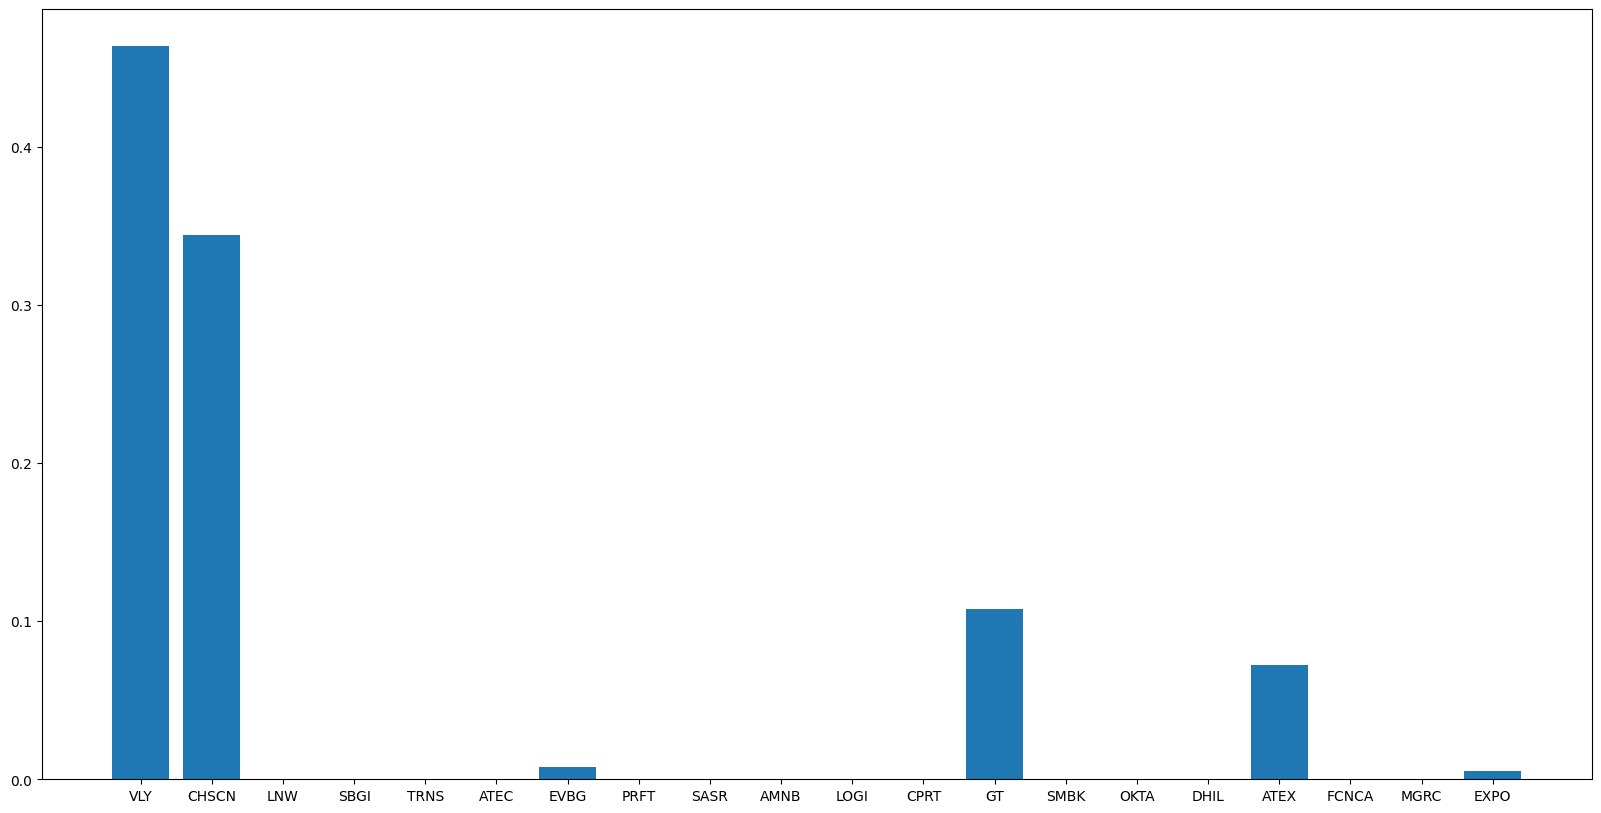

In [23]:
mad_model = MADModel(past_5_years, 0.05, "2021-01-01")
w = mad_model()

plt.figure(figsize=(20, 10))
plt.bar(past_5_years.columns, w)

<BarContainer object of 20 artists>

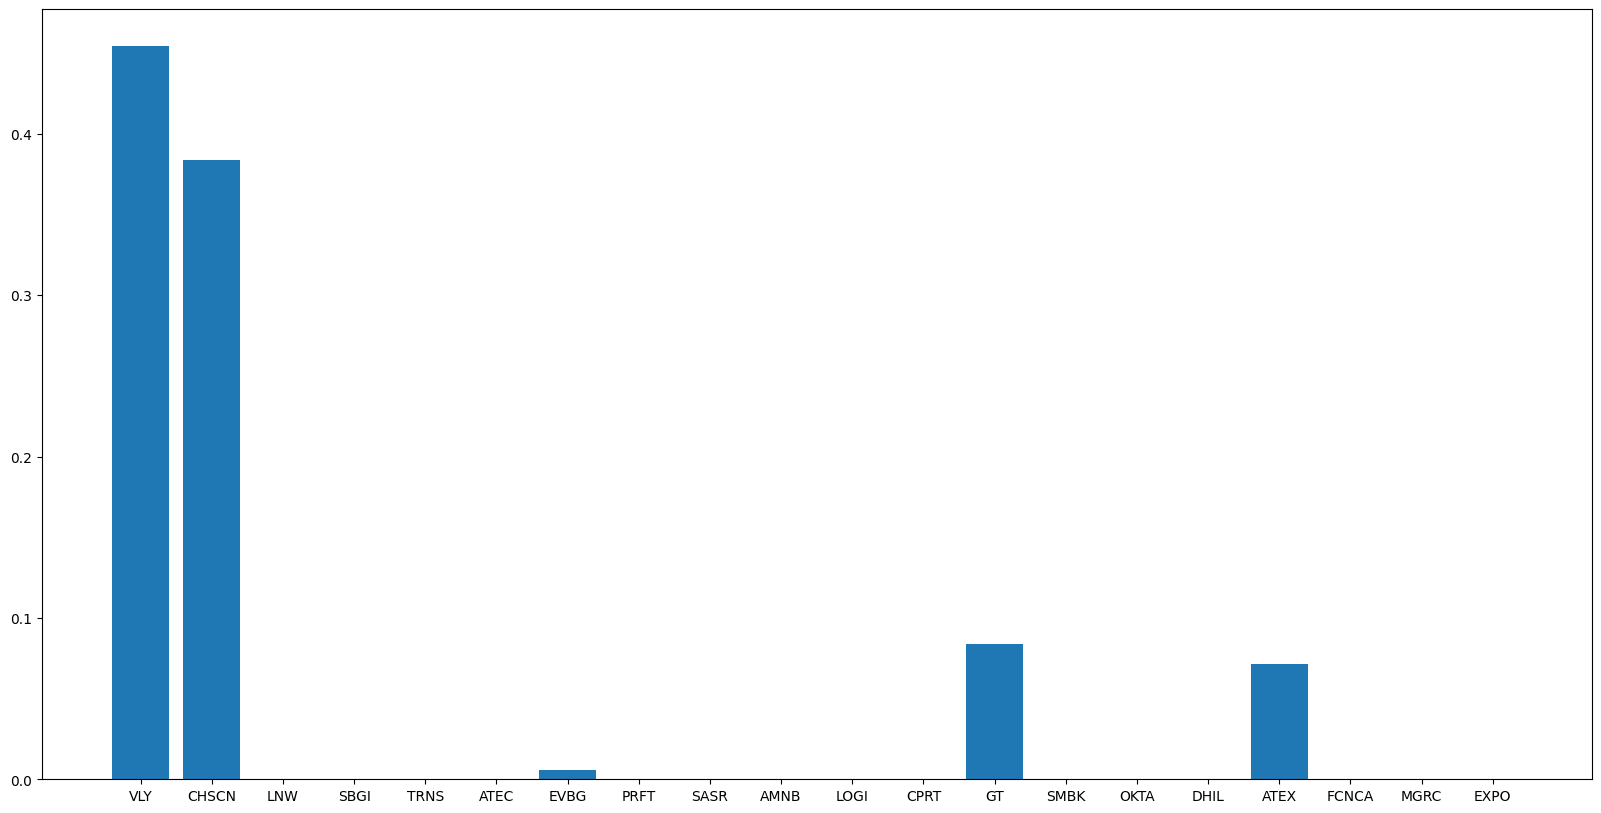

In [24]:
mw_model = MarkowitzModel(past_5_years, 0.05, "2021-01-01")
w = mw_model()

plt.figure(figsize=(20, 10))
plt.bar(past_5_years.columns, w)